# Online Retail ML

The aim of this notebook is to explore the application of various Machine Learning tools in relation to the Online Retail dataset.
Some values hardcoded during ETL to comply with accounting convention and to compensate for missing data.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

In [24]:
schema_de = {
    'Date': 'string',
    'Account': 'string',
    'Debit': 'float64',
    'Credit': 'float64',
    'Category': 'string',
    'Transaction Type': 'string',
    'Customer_Vendor': 'string',
    'Payment Method': 'string',
    'Country': 'string'
}
online_schema = {
    'InvoiceNo': 'string',
    'InvoiceDate': 'string',
    'StockCode': 'string',
    'Quantity': 'int64',
    'UnitPrice' : 'float64',
    'CustomerID' : 'string',
    'Country' : 'string'
}

df = pd.read_csv('../data/double_entry_online_retail.csv', dtype=schema_de)
df['Date'] = pd.to_datetime(df['Date']) - pd.DateOffset(years=1)

df_og = pd.read_csv('../data/online_retail_sampled.csv', dtype=schema_de).sample(10000)
df_og['InvoiceDate'] = pd.to_datetime(df_og['InvoiceDate']) - pd.DateOffset(years=1)
df_og = df_og[df_og.duplicated('StockCode', keep=False)]
df_og = df_og.loc[df_og['StockCode'].notna()&df_og['Quantity'].notna()&df_og['UnitPrice'].notna()&df_og['CustomerID'].notna()&df_og['Country'].notna()]
df_og['CustomerID'] = df_og['CustomerID'].astype(int).astype(str)

## Classification

### Country

In [25]:
df_classify = df.copy()
label_encoders = {}
for column in ['Transaction Type', 'Account', 'Category', 'Customer_Vendor', 'Payment Method']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

features = ['Transaction Type', 'Account', 'Category', 'Customer_Vendor', 'Payment Method', 'Debit', 'Credit']
country_X = df_classify[features]
country_y = df_classify['Country']

country_X_train, country_X_test, country_y_train, country_y_test = train_test_split(country_X, country_y, test_size=0.3, random_state=42, stratify=country_y)

country_classification_model = RandomForestClassifier(random_state=42)
country_classification_model.fit(country_X_train, country_y_train)

country_y_pred = country_classification_model.predict(country_X_test)
print(classification_report(country_y_test, country_y_pred))

                      precision    recall  f1-score   support

           Australia       0.82      0.86      0.84       146
             Austria       0.67      0.63      0.65        51
             Bahrain       0.20      0.33      0.25         3
             Belgium       0.79      0.84      0.81       221
              Brazil       0.80      0.57      0.67         7
              Canada       1.00      0.77      0.87        13
     Channel Islands       0.95      0.91      0.93        91
              Cyprus       0.67      0.71      0.69        62
      Czech Republic       0.00      0.00      0.00         4
             Denmark       0.66      0.48      0.55        48
                EIRE       0.99      0.99      0.99       817
  European Community       1.00      0.50      0.67         2
             Finland       0.86      0.68      0.76        80
              France       0.87      0.91      0.89       925
             Germany       0.91      0.91      0.91      1039
       

### Customer

In [26]:
df_classify = df_og.copy()
label_encoders = {}
for column in ['Country','StockCode']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

features = ['Country','StockCode','Quantity','UnitPrice']
customer_X = df_classify[features]
customer_y = df_classify['CustomerID']

customer_X_train, customer_X_test, customer_y_train, customer_y_test = train_test_split(customer_X, customer_y, test_size=0.3, random_state=42)

customer_classification_model = RandomForestClassifier(max_depth=5, random_state=42)
customer_classification_model.fit(customer_X_train, customer_y_train)

customer_y_pred = customer_classification_model.predict(customer_X_test)
print(classification_report(customer_y_test, customer_y_pred))

              precision    recall  f1-score   support

       12347       0.00      0.00      0.00         1
       12348       0.00      0.00      0.00         1
       12360       0.00      0.00      0.00         0
       12362       0.00      0.00      0.00         3
       12370       0.00      0.00      0.00         1
       12377       0.00      0.00      0.00         1
       12379       0.00      0.00      0.00         1
       12380       0.00      0.00      0.00         1
       12383       0.00      0.00      0.00         1
       12388       0.00      0.00      0.00         1
       12391       1.00      1.00      1.00         2
       12394       0.00      0.00      0.00         1
       12395       0.00      0.00      0.00         1
       12397       0.00      0.00      0.00         1
       12399       0.00      0.00      0.00         1
       12406       0.00      0.00      0.00         1
       12409       0.00      0.00      0.00         1
       12412       0.00    

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.

### Product

In [27]:
df_classify = df_og.copy()
label_encoders = {}

for column in ['StockCode','CustomerID','Country']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

features = ['StockCode','Quantity','UnitPrice','CustomerID','Country']
stockcode_X = df_classify[features]
stockcode_y = df_classify['StockCode']

stockcode_X_train, stockcode_X_test, stockcode_y_train, stockcode_y_test = train_test_split(stockcode_X, stockcode_y, test_size=0.3, random_state=42)

stockcode_classification_model = RandomForestClassifier(random_state=42)
stockcode_classification_model.fit(stockcode_X_train, stockcode_y_train)

stockcode_y_pred = stockcode_classification_model.predict(stockcode_X_test)
print(classification_report(stockcode_y_test, stockcode_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      1.00      0.40         1
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         1
           5       0.75      1.00      0.86         3
           6       0.67      0.67      0.67         3
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.67      1.00      0.80         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.50    

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.

## Anomaly Detection
Having trained the classification models, we can leverage them to detect potentially anomalous classifications in the data. In this implementation, we create a dataframe of transactions for which the classification model is unable to assign a clear class with high confidence. If the highest probability for every class within a transaction is below a certain threshold, it is automatically flagged as anunusual transactions. Such transactions are flagged as potentially anomalous for further investigation.

In [32]:
# Example with category classification model
model = country_classification_model
probabilities = model.predict_proba(country_X_test)
threshold = 0.3 # 30% threshold, dependent on business requirements

suspicious_indices = []
for i, probs in enumerate(probabilities):
    if max(probs) < threshold:
        suspicious_indices.append(i)

df_suspicious = country_X_test.iloc[suspicious_indices]
print("Suspicious Transactions:")
df_suspicious = df.loc[df_suspicious.index]
df_suspicious

Suspicious Transactions:


,Date,Account,Debit,Credit,Category,Transaction Type,Customer_Vendor,Payment Method,Country
145222,2021-04-04,Accounts Receivable,39.80,0.0,Revenue,Sale,12407.0,Credit Card,Belgium
26014,2021-07-14,Accounts Receivable,16.95,0.0,Revenue,Sale,12743.0,Credit Card,Unspecified
116261,2021-01-19,Sales Revenue,0.00,20.4,Revenue,Sale,12350.0,Credit Card,Norway
74597,2021-04-01,Sales Revenue,0.00,61.2,Revenue,Sale,12769.0,Credit Card,Brazil
22748,2021-05-22,Accounts Receivable,8.50,0.0,Revenue,Sale,12449.0,Credit Card,Belgium
135519,2021-10-23,Sales Revenue,0.00,25.2,Revenue,Sale,12357.0,Credit Card,Switzerland
42770,2021-07-29,Accounts Receivable,49.50,0.0,Revenue,Sale,12399.0,Credit Card,Belgium
42095,2021-04-01,Sales Revenue,0.00,61.2,Revenue,Sale,12769.0,Credit Card,Brazil
49652,2021-01-11,Accounts Receivable,41.76,0.0,Revenue,Sale,12348.0,Credit Card,Finland
145223,2021-04-04,Sales Revenue,0.00,39.8,Revenue,Sale,12407.0,Credit Card,Belgium


## Clustering

### Country

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


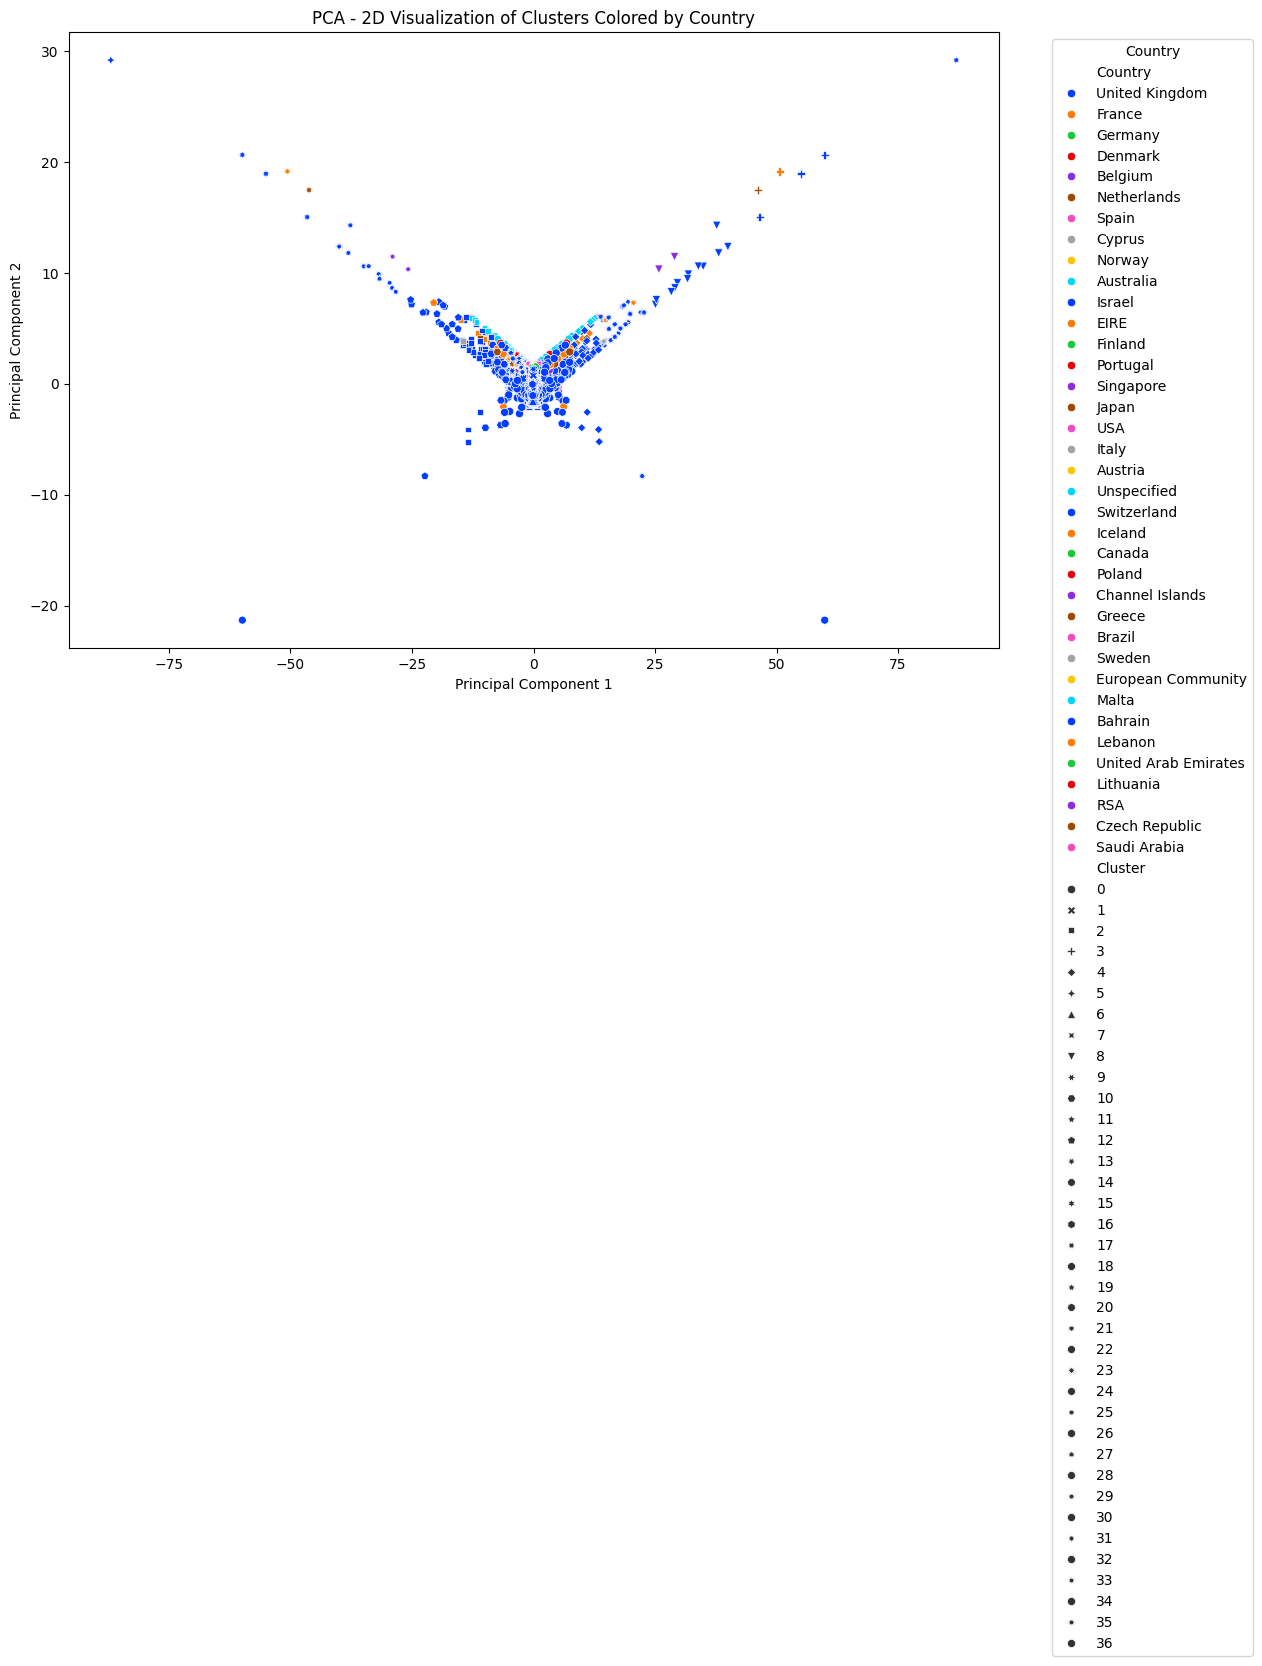

In [28]:
df_cluster = df.copy()
df_cluster = df_cluster.drop(['Date','Category','Transaction Type','Payment Method','Account'], axis=1)

label_encoders = {}
for column in df_cluster.select_dtypes(include=['object']).columns:
    if column != 'Country':
        le = LabelEncoder()
        df_cluster[column] = le.fit_transform(df_cluster[column])
        label_encoders[column] = le

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('Country', axis=1))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=df.Country.nunique(), random_state=42)
kmeans.fit(pca_features)
df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], 
                hue=df_cluster['Country'], palette='bright', 
                style=df_cluster['Cluster'])
plt.title('PCA - 2D Visualization of Clusters Colored by Country')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### StockCode

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


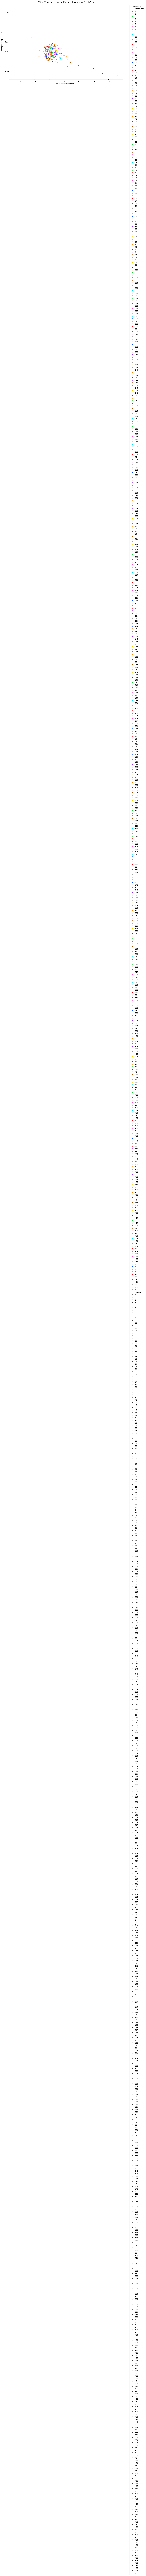

In [8]:
top_stockcodes = df_og['StockCode'].value_counts().nlargest(500).index
df_here = df_og[df_og['StockCode'].isin(top_stockcodes)]

df_cluster = df_og[df_og['StockCode'].isin(top_stockcodes)]
df_cluster = df_cluster.drop(['InvoiceDate','Country','CustomerID'], axis=1)

label_encoders = {}
for column in df_cluster.select_dtypes(include=['object']).columns:
    if column != 'Country':
        le = LabelEncoder()
        df_cluster[column] = le.fit_transform(df_cluster[column])
        label_encoders[column] = le

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('StockCode', axis=1))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=df_here['StockCode'].nunique(), random_state=42)
kmeans.fit(pca_features)
df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], 
                hue=df_cluster['StockCode'], palette='bright', 
                style=df_cluster['Cluster'])
plt.title('PCA - 2D Visualization of Clusters Colored by StockCode')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()